# T - Student 

# Menu

- [Ejercicio 1](#ex_1)
- [Ejercicio 2](#ex_2)
- [Ejercicio 3](#ex_3)
- [Ejercicio 4](#ex_4)
- [Ejercicio 5](#ex_5)
- [Ejercicio 6](#ex_6)
- [Ejercicio 7](#ex_7)
- [Ejercicio 8](#ex_8)
- [Ejercicio 9](#ex_9)

In [2]:
from scipy.stats import norm

<div id=ex_1></div>

[[Menu]](#Menu)   |   [[Siguiente]](#ex_2) 
___
<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 1</span>.

La cirugía menor de caballos en condiciones de campo requiere un anestésico de corta duración confiable que produzca una buena relajación muscular, cambios cardiovasculares y respiratorios mínimos y una rápida y tranquila recuperación con un mínimo de efectos secundarios de modo que los caballos puedan ser dejados sin atención. El artículo "A Field Trial of Ketamine Anesthesia in the Horse" (Equine Vet. J., 1984: 176-179) reporta que con una muestra de n=73 caballos a los cuales se les administró ketamina en ciertas condiciones, el tiempo de reclinación lateral (echado) promedio muestral fue de 18.86 min y la desviación estándar de 8.6 min. ¿Sugieren estos datos que el tiempo de reclinación lateral promedio verdadera en estas condiciones es menor que 20 min? Pruebe las hipótesis apropiadas a un nivel de significación de 0.10.

In [3]:
import numpy as np
from scipy import stats

def prueba_t_una_muestra_cola_izquierda(media_muestra, desv_std_muestra, tamano_muestra, media_hipotetica, nivel_significancia):

    # 1. Calcular los grados de libertad
    grados_libertad = tamano_muestra - 1

    # 2. Calcular el error estándar de la media
    error_estandar = desv_std_muestra / np.sqrt(tamano_muestra)

    # 3. Calcular el estadístico t
    t_estadistico = (media_muestra - media_hipotetica) / error_estandar

    # 4. Calcular el p-valor para una prueba de cola izquierda
    # stats.t.cdf(t, df) devuelve la probabilidad acumulada hasta t para df grados de libertad
    p_valor = stats.t.cdf(t_estadistico, grados_libertad)

    # 5. Calcular el valor crítico de t
    # stats.t.ppf(alpha, df) devuelve el valor de t para una probabilidad acumulada de alpha
    valor_critico = stats.t.ppf(nivel_significancia, grados_libertad)

    # 6. Tomar la decisión
    if p_valor < nivel_significancia:
        conclusion = "Rechazamos la hipótesis nula (H0)."
        razon_conclusion = f"El p-valor ({p_valor:.4f}) es menor que el nivel de significancia ({nivel_significancia})."
    else:
        conclusion = "No rechazamos la hipótesis nula (H0)."
        razon_conclusion = f"El p-valor ({p_valor:.4f}) no es menor que el nivel de significancia ({nivel_significancia})."

    # También podemos añadir la comparación con el valor crítico para mayor claridad
    if t_estadistico < valor_critico:
        conclusion_critica = "Rechazamos la hipótesis nula (H0)."
        razon_critica = f"El estadístico t ({t_estadistico:.4f}) es menor que el valor crítico ({valor_critico:.4f})."
    else:
        conclusion_critica = "No rechazamos la hipótesis nula (H0)."
        razon_critica = f"El estadístico t ({t_estadistico:.4f}) no es menor que el valor crítico ({valor_critico:.4f})."


    return t_estadistico, p_valor, valor_critico, conclusion, razon_conclusion, conclusion_critica, razon_critica

# --- Datos del problema ---
media_muestral = 18.86
desviacion_estandar_muestral = 8.6
tamano_de_muestra = 73
media_poblacional_hipotetica = 20
alpha = 0.10

print("--- Análisis de la Prueba de Hipótesis ---")
print(f"Hipótesis Nula (H0): La media poblacional (μ) es ≥ {media_poblacional_hipotetica} minutos.")
print(f"Hipótesis Alternativa (Ha): La media poblacional (μ) es < {media_poblacional_hipotetica} minutos (prueba de cola izquierda).")
print(f"Nivel de significancia (α): {alpha}")
print(f"Datos de la muestra: Media = {media_muestral}, Desviación Estándar = {desviacion_estandar_muestral}, Tamaño = {tamano_de_muestra}\n")

# Ejecutar la función de prueba de hipótesis
t_calc, p_val, t_crit, conc_pval, razon_pval, conc_crit, razon_crit = prueba_t_una_muestra_cola_izquierda(
    media_muestral,
    desviacion_estandar_muestral,
    tamano_de_muestra,
    media_poblacional_hipotetica,
    alpha
)

# Mostrar los resultados
print(f"1. Grados de Libertad (df): {tamano_de_muestra - 1}")
print(f"2. Estadístico t calculado: {t_calc:.4f}")
print(f"3. P-valor (prueba de cola izquierda): {p_val:.4f}")
print(f"4. Valor crítico de t (para α={alpha} y df={tamano_de_muestra - 1}): {t_crit:.4f}\n")

print("--- Decisión (Basada en P-valor) ---")
print(f"{conc_pval} {razon_pval}")

print("\n--- Decisión (Basada en Valor Crítico) ---")
print(f"{conc_crit} {razon_crit}")

print("\n--- Conclusión Final ---")
if p_val < alpha:
    print(f"Hay evidencia estadística suficiente para concluir que el tiempo promedio verdadero de reclinación lateral es menor que {media_poblacional_hipotetica} minutos.")
else:
    print(f"No hay evidencia estadística suficiente para concluir que el tiempo promedio verdadero de reclinación lateral es menor que {media_poblacional_hipotetica} minutos.")

print("\n(Esto significa que los datos no apoyan que el tiempo sea significativamente menor de 20 minutos a este nivel de significancia).")

--- Análisis de la Prueba de Hipótesis ---
Hipótesis Nula (H0): La media poblacional (μ) es ≥ 20 minutos.
Hipótesis Alternativa (Ha): La media poblacional (μ) es < 20 minutos (prueba de cola izquierda).
Nivel de significancia (α): 0.1
Datos de la muestra: Media = 18.86, Desviación Estándar = 8.6, Tamaño = 73

1. Grados de Libertad (df): 72
2. Estadístico t calculado: -1.1326
3. P-valor (prueba de cola izquierda): 0.1306
4. Valor crítico de t (para α=0.1 y df=72): -1.2934

--- Decisión (Basada en P-valor) ---
No rechazamos la hipótesis nula (H0). El p-valor (0.1306) no es menor que el nivel de significancia (0.1).

--- Decisión (Basada en Valor Crítico) ---
No rechazamos la hipótesis nula (H0). El estadístico t (-1.1326) no es menor que el valor crítico (-1.2934).

--- Conclusión Final ---
No hay evidencia estadística suficiente para concluir que el tiempo promedio verdadero de reclinación lateral es menor que 20 minutos.

(Esto significa que los datos no apoyan que el tiempo sea signif

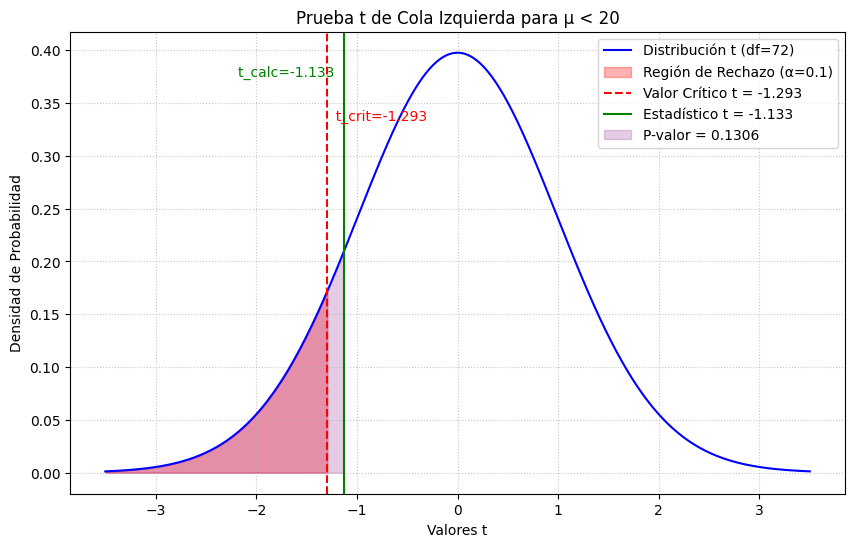


--- Conclusión Final ---
No hay evidencia estadística suficiente para concluir que el tiempo promedio verdadero de reclinación lateral es menor que 20 minutos.

(Esto significa que los datos no apoyan que el tiempo sea significativamente menor de 20 minutos a este nivel de significancia).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def graficar_prueba_t_cola_izquierda(media_muestra, desv_std_muestra, tamano_muestra, media_hipotetica, nivel_significancia):
 
    # 1. Calcular los grados de libertad
    grados_libertad = tamano_muestra - 1

    # 2. Calcular el error estándar de la media
    error_estandar = desv_std_muestra / np.sqrt(tamano_muestra)

    # 3. Calcular el estadístico t
    t_estadistico = (media_muestra - media_hipotetica) / error_estandar

    # 4. Calcular el p-valor para una prueba de cola izquierda
    p_valor = stats.t.cdf(t_estadistico, grados_libertad)

    # 5. Calcular el valor crítico de t
    valor_critico = stats.t.ppf(nivel_significancia, grados_libertad)

    # --- Generación de la Gráfica ---
    plt.figure(figsize=(10, 6))

    # Definir un rango de valores t para graficar la distribución
    # Aseguramos que el rango incluya el estadístico t, el valor crítico y cubra las colas
    min_t = min(t_estadistico, valor_critico, -3) - 0.5
    max_t = max(t_estadistico, valor_critico, 3) + 0.5
    x = np.linspace(min_t, max_t, 500)

    # Graficar la función de densidad de probabilidad (PDF) de la distribución t
    pdf = stats.t.pdf(x, grados_libertad)
    plt.plot(x, pdf, label=f'Distribución t (df={grados_libertad})', color='blue')

    # Rellenar la región de rechazo (cola izquierda)
    x_rechazo = np.linspace(min_t, valor_critico, 100)
    y_rechazo = stats.t.pdf(x_rechazo, grados_libertad)
    plt.fill_between(x_rechazo, 0, y_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α={nivel_significancia})')

    # Marcar el valor crítico
    plt.axvline(valor_critico, color='red', linestyle='--', label=f'Valor Crítico t = {valor_critico:.3f}')
    plt.text(valor_critico, plt.ylim()[1]*0.8, f'  t_crit={valor_critico:.3f}', color='red', ha='left')


    # Marcar el estadístico t calculado
    plt.axvline(t_estadistico, color='green', linestyle='-', label=f'Estadístico t = {t_estadistico:.3f}')
    plt.text(t_estadistico, plt.ylim()[1]*0.9, f't_calc={t_estadistico:.3f}  ', color='green', ha='right')

    # Añadir el p-valor en la gráfica
    x_p_valor = np.linspace(min_t, t_estadistico, 100)
    y_p_valor = stats.t.pdf(x_p_valor, grados_libertad)
    plt.fill_between(x_p_valor, 0, y_p_valor, color='purple', alpha=0.2, label=f'P-valor = {p_valor:.4f}')


    # Etiquetas y título
    plt.title(f'Prueba t de Cola Izquierda para μ < {media_hipotetica}')
    plt.xlabel('Valores t')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

    # Imprimir los resultados numéricos y la conclusión (como en el código anterior)

    print("\n--- Conclusión Final ---")
    if p_valor < nivel_significancia:
        print(f"Hay evidencia estadística suficiente para concluir que el tiempo promedio verdadero de reclinación lateral es menor que {media_hipotetica} minutos.")
    else:
        print(f"No hay evidencia estadística suficiente para concluir que el tiempo promedio verdadero de reclinación lateral es menor que {media_hipotetica} minutos.")
    print("\n(Esto significa que los datos no apoyan que el tiempo sea significativamente menor de 20 minutos a este nivel de significancia).")


# --- Datos del problema ---
media_muestral = 18.86
desviacion_estandar_muestral = 8.6
tamano_de_muestra = 73
media_poblacional_hipotetica = 20
alpha = 0.10

# Llamar a la función para graficar y mostrar la solución
graficar_prueba_t_cola_izquierda(
    media_muestral,
    desviacion_estandar_muestral,
    tamano_de_muestra,
    media_poblacional_hipotetica,
    alpha
)


<div id=ex_2></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_1)   [[Siguiente]](#ex_3) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 2</span>. 

 Considere la prueba de hipótesis siguiente:
 
H_0:mu=100

H_a:mu =neq100

Se usa una muestra de 65. Identifique el valor-p y establezca su conclusión para cada uno de los siguientes resultados muestrales. Use 

alpha=0.05.

a. 
barx=103 y s=11.5

b. 
barx=96.5 y s=11.0

c. 
barx=102 y s=10.5

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def realizar_prueba_t_dos_colas(media_muestral, desviacion_estandar_muestral, n, mu_nula, alpha):
 
    grados_libertad = n - 1
    error_estandar = desviacion_estandar_muestral / np.sqrt(n)
    estadistico_t = (media_muestral - mu_nula) / error_estandar

    # Calcular el p-valor para una prueba de dos colas
    p_valor = 2 * stats.t.sf(abs(estadistico_t), grados_libertad) # sf es survival function (1-cdf)

    conclusion = "No hay suficiente evidencia para rechazar H0."
    if p_valor <= alpha:
        conclusion = "Se rechaza la hipótesis nula (H0)."

    return estadistico_t, p_valor, conclusion, grados_libertad

def graficar_distribucion_t(estadistico_t, grados_libertad, p_valor, alpha, mu_nula, media_muestral, s, n):
    """
    Genera una gráfica para interpretar el resultado de la prueba t.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.linspace(stats.t.ppf(0.001, grados_libertad),
                    stats.t.ppf(0.999, grados_libertad), 500)
    ax.plot(x, stats.t.pdf(x, grados_libertad), 'k-', lw=2, label='Distribución t')

    # Región de rechazo (colas)
    t_critico = stats.t.ppf(1 - alpha/2, grados_libertad)
    x_rechazo_derecha = x[x >= t_critico]
    x_rechazo_izquierda = x[x <= -t_critico]
    ax.fill_between(x_rechazo_derecha, 0, stats.t.pdf(x_rechazo_derecha, grados_libertad), color='red', alpha=0.3, label=f'Región de Rechazo (alpha={alpha})')
    ax.fill_between(x_rechazo_izquierda, 0, stats.t.pdf(x_rechazo_izquierda, grados_libertad), color='red', alpha=0.3)

    # Estadístico t calculado
    ax.axvline(x=estadistico_t, color='blue', linestyle='--', lw=2, label=f'Estadístico t = {estadistico_t:.4f}')

    # P-valor sombreado
    # Para el p-valor, sombreamos las áreas más allá de |t| en ambas colas
    x_p_val_derecha = x[x >= abs(estadistico_t)]
    x_p_val_izquierda = x[x <= -abs(estadistico_t)]
    ax.fill_between(x_p_val_derecha, 0, stats.t.pdf(x_p_val_derecha, grados_libertad), color='green', alpha=0.3, label=f'P-valor = {p_valor:.4f}')
    ax.fill_between(x_p_val_izquierda, 0, stats.t.pdf(x_p_val_izquierda, grados_libertad), color='green', alpha=0.3)


    ax.set_title(f'Distribución t de Student (df={grados_libertad})\n'
                 f'H0: $\\mu$ = {mu_nula}, Ha: $\\mu \\neq$ {mu_nula}\n'
                 f'Datos: $\\bar{{x}}$={media_muestral}, s={s}, n={n}')
    ax.set_xlabel('Valor t')
    ax.set_ylabel('Densidad de Probabilidad')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.show()

--- Inciso a ---
Estadístico t: 2.1032
P-valor: 0.0394
Conclusión: Se rechaza la hipótesis nula (H0).


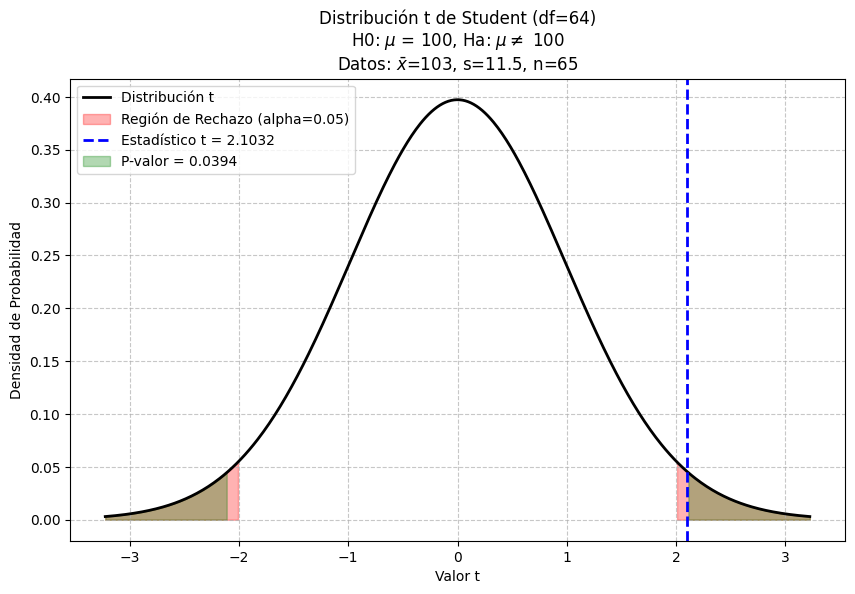

In [6]:
# --- Código que resuelve el inciso a ---
n_a = 65
mu_nula_a = 100
alpha_a = 0.05
media_muestral_a = 103
desviacion_estandar_muestral_a = 11.5

t_a, p_valor_a, conclusion_a, df_a = realizar_prueba_t_dos_colas(
    media_muestral_a, desviacion_estandar_muestral_a, n_a, mu_nula_a, alpha_a
)

print(f"--- Inciso a ---")
print(f"Estadístico t: {t_a:.4f}")
print(f"P-valor: {p_valor_a:.4f}")
print(f"Conclusión: {conclusion_a}")

# --- Código que grafica o interpreta el resultado del inciso a ---
graficar_distribucion_t(t_a, df_a, p_valor_a, alpha_a, mu_nula_a, media_muestral_a, desviacion_estandar_muestral_a, n_a)


--- Inciso b ---
Estadístico t: -2.5653
P-valor: 0.0127
Conclusión: Se rechaza la hipótesis nula (H0).


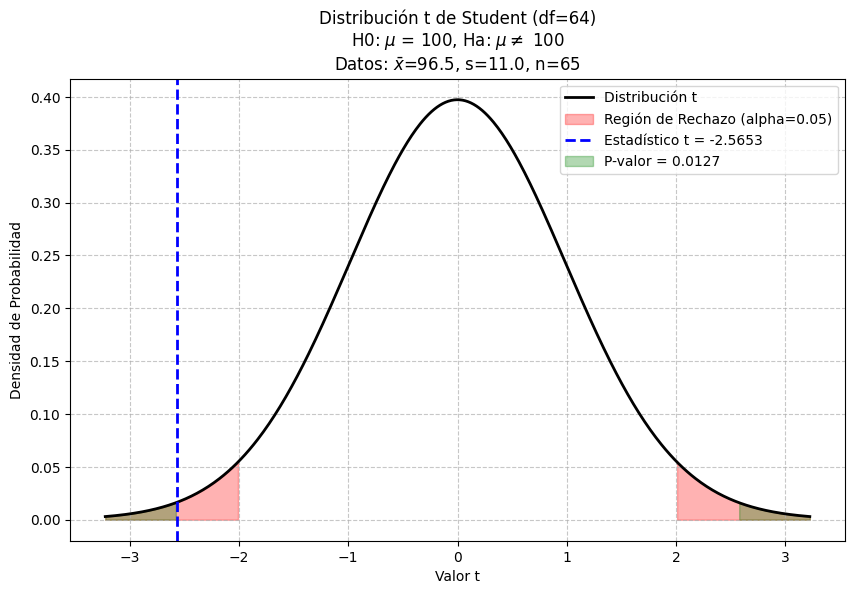

In [7]:
# --- Código que resuelve el inciso b ---
n_b = 65
mu_nula_b = 100
alpha_b = 0.05
media_muestral_b = 96.5
desviacion_estandar_muestral_b = 11.0

t_b, p_valor_b, conclusion_b, df_b = realizar_prueba_t_dos_colas(
    media_muestral_b, desviacion_estandar_muestral_b, n_b, mu_nula_b, alpha_b
)

print(f"\n--- Inciso b ---")
print(f"Estadístico t: {t_b:.4f}")
print(f"P-valor: {p_valor_b:.4f}")
print(f"Conclusión: {conclusion_b}")

# --- Código que grafica o interpreta el resultado del inciso b ---
graficar_distribucion_t(t_b, df_b, p_valor_b, alpha_b, mu_nula_b, media_muestral_b, desviacion_estandar_muestral_b, n_b)


--- Inciso c ---
Estadístico t: 1.5357
P-valor: 0.1295
Conclusión: No hay suficiente evidencia para rechazar H0.


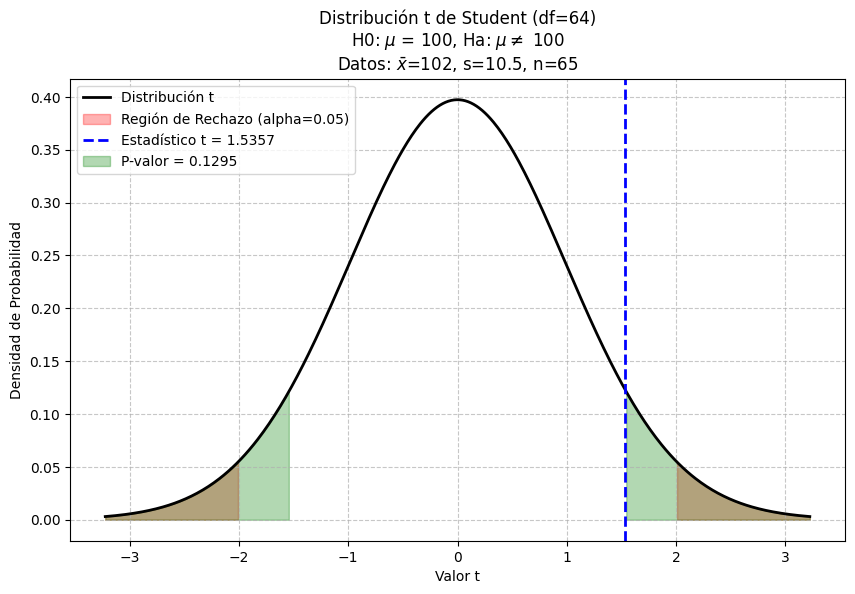

In [8]:
# --- Código que resuelve el inciso c ---
n_c = 65
mu_nula_c = 100
alpha_c = 0.05
media_muestral_c = 102
desviacion_estandar_muestral_c = 10.5

t_c, p_valor_c, conclusion_c, df_c = realizar_prueba_t_dos_colas(
    media_muestral_c, desviacion_estandar_muestral_c, n_c, mu_nula_c, alpha_c
)

print(f"\n--- Inciso c ---")
print(f"Estadístico t: {t_c:.4f}")
print(f"P-valor: {p_valor_c:.4f}")
print(f"Conclusión: {conclusion_c}")

# --- Código que grafica o interpreta el resultado del inciso c ---
graficar_distribucion_t(t_c, df_c, p_valor_c, alpha_c, mu_nula_c, media_muestral_c, desviacion_estandar_muestral_c, n_c)

<div id=ex_3></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_2)   [[Siguiente]](#ex_4) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 3</span>. 

Sea X una variable aleatoria con distribución t-Student con 15 grados de libertad. Calcule t_a, tal que P(T
let_a)=0.95.

In [9]:
from scipy import stats

# Datos del problema
grados_libertad = 15
probabilidad_acumulada = 0.95

# Calcular ta usando la función ppf de scipy.stats.t
# ppf(probabilidad_acumulada, grados_libertad)
ta = stats.t.ppf(probabilidad_acumulada, grados_libertad)

print(f"--- Resolución del Ejercicio ---")
print(f"Grados de Libertad (gl): {grados_libertad}")
print(f"Probabilidad P(T <= ta): {probabilidad_acumulada}")
print(f"El valor de ta es: {ta:.3f}")

--- Resolución del Ejercicio ---
Grados de Libertad (gl): 15
Probabilidad P(T <= ta): 0.95
El valor de ta es: 1.753


--- Gráfico de la Distribución t-Student ---


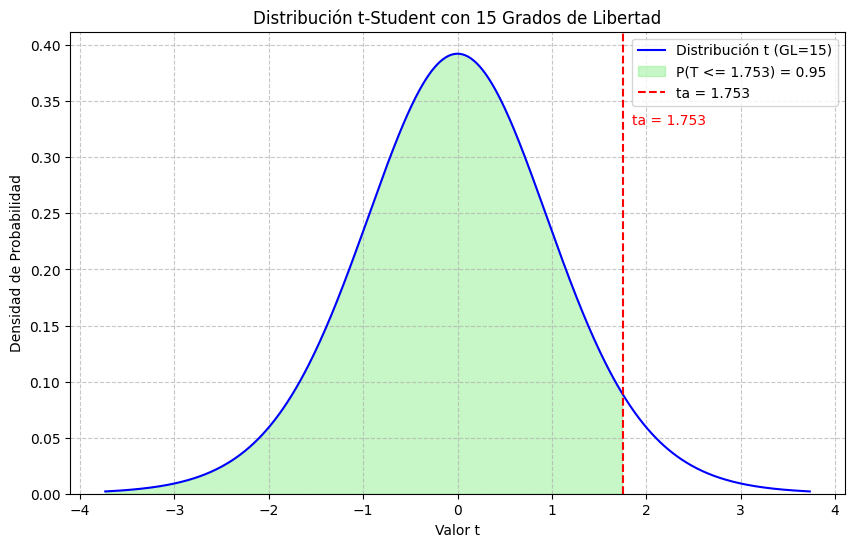


  El gráfico muestra la distribución t-Student con 15 grados de libertad.
  El área sombreada en verde representa la probabilidad acumulada de 0.95 (95%) a la izquierda de 1.753.
  La línea roja discontinua indica la posición del valor de ta = 1.753 en el eje t.


In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- Datos del problema (obtenidos del código anterior) ---
grados_libertad = 15
probabilidad_acumulada = 0.95
ta = 1.753 # El valor de ta calculado previamente

print("--- Gráfico de la Distribución t-Student ---")

# --- Código para generar el gráfico ---

plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Rango de valores para el eje x de la distribución t
# Vamos desde un percentil muy bajo (0.001) hasta uno muy alto (0.999)
x = np.linspace(stats.t.ppf(0.001, grados_libertad),
                stats.t.ppf(0.999, grados_libertad), 500)

# Valores de la función de densidad de probabilidad (PDF) para la distribución t
pdf_t = stats.t.pdf(x, grados_libertad)

# Dibujar la curva de la distribución t
plt.plot(x, pdf_t, label=f'Distribución t (GL={grados_libertad})', color='blue')

# Rellenar el área a la izquierda de ta (probabilidad acumulada)
# Seleccionamos los valores de x que son menores o iguales a ta
x_relleno = x[x <= ta]
plt.fill_between(x_relleno, 0, stats.t.pdf(x_relleno, grados_libertad), color='lightgreen', alpha=0.5, label=f'P(T <= {ta:.3f}) = {probabilidad_acumulada}')

# Marcar el valor de ta en el eje x
plt.axvline(ta, color='red', linestyle='--', label=f'ta = {ta:.3f}')
plt.text(ta + 0.1, plt.ylim()[1] * 0.8, f'ta = {ta:.3f}', color='red') # Etiqueta para ta

# Etiquetas y título
plt.title(f'Distribución t-Student con {grados_libertad} Grados de Libertad')
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5) # Eje x en cero
plt.ylim(bottom=0) # Asegurar que el eje y empiece en 0

plt.show() # Mostrar el gráfico

print("\n  El gráfico muestra la distribución t-Student con 15 grados de libertad.")
print(f"  El área sombreada en verde representa la probabilidad acumulada de {probabilidad_acumulada} (95%) a la izquierda de {ta:.3f}.")
print(f"  La línea roja discontinua indica la posición del valor de ta = {ta:.3f} en el eje t.")

<div id=ex_4></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_3)   [[Siguiente]](#ex_5) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 4</span>. 

La ración dietética diaria recomendada de zinc entre varones de
más de 50 años es de 15 mg/día. El artículo “Nutrient Intakes                                               105.6 ,90.9, 91.2, 96.9, 96.5, 91.3,100.1, 105.0, 99.6 ,107.7 ,103.3 ,92.4    

a. ¿Sugieren estos datos que la lectura media de la población en estas condiciones difieren de 100? Formule y
pruebe las hipótesis apropiadas con  0.05.

Media muestral: 98.37500000000001
Desviación estándar muestral (s): 6.10947475796257
Valor de t : -0.9213828271018268
Valor crítico de t: 2.200985160082949
P-valor: 0.37661608746499975
No rechazar la hipotesis nula (H0): no hay evidencia suficiente para decir que la media difiere de 100 mg/día.


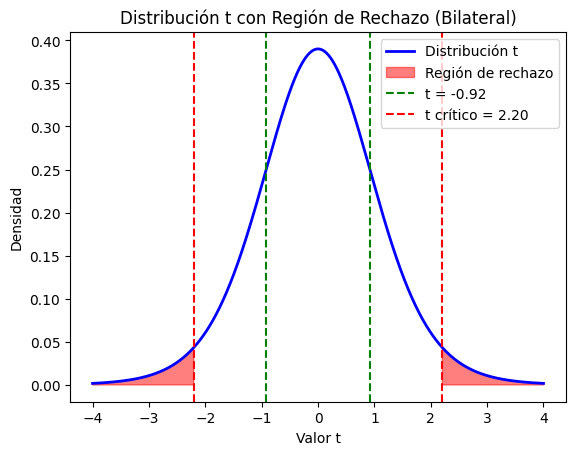

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos del problema
data = [105.6, 90.9, 91.2, 96.9, 96.5, 91.3, 100.1, 105.0, 99.6, 107.7, 103.3, 92.4]
n = len(data)
x = np.mean(data)
s = np.std(data, ddof=1)
mu_0 = 100
alpha = 0.05

# Calculo del estadistico t
t_statistic = (x - mu_0) / (s / (n ** 0.5))

# Grados de libertad
df = n - 1

# Valor critico de t 
t_critical = stats.t.ppf(1 - alpha/2, df)

# Calcular el p-valor (bilateral)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Mostrar resultados
print(f"Media muestral: {x}")
print(f"Desviación estándar muestral (s): {s}")
print(f"Valor de t : {t_statistic}")
print(f"Valor crítico de t: {t_critical}")
print(f"P-valor: {p_value}")

# Decision
if abs(t_statistic) > t_critical or p_value < alpha:
    print("Rechazar la hipotesis nula (H0): la media de ingesta de zinc difiere de 100 mg/día.")
else:
    print("No rechazar la hipotesis nula (H0): no hay evidencia suficiente para decir que la media difiere de 100 mg/día.")

# Crear grafica de campana (distribucion t)
x_axis = np.linspace(-4, 4, 1000)
t_distribution = stats.t.pdf(x_axis, df)

plt.plot(x_axis, t_distribution, 'b-', lw=2, label='Distribución t')
plt.fill_between(x_axis, t_distribution, where=(x_axis <= -t_critical) | (x_axis >= t_critical), color='red', alpha=0.5, label='Región de rechazo')
plt.axvline(x=t_statistic, color='green', linestyle='--', label=f't = {t_statistic:.2f}')
plt.axvline(x=-t_statistic, color='green', linestyle='--')
plt.axvline(x=t_critical, color='r', linestyle='--', label=f't crítico = {t_critical:.2f}')
plt.axvline(x=-t_critical, color='r', linestyle='--')
plt.title('Distribución t con Región de Rechazo (Bilateral)')
plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.legend()
plt.show()

<div id=ex_5></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_4)   [[Siguiente]](#ex_6) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 5</span>. 

Se desea probar si la media poblacional $\mu$ del desgaste de la flecha (en pulg) después de un kilometraje fijo es igual a 3.50 pulg contra la alternativa de que $\mu > 3.50$ pulg, con un nivel de significación de 0.05. Se tiene una muestra de $n = 8$ motores de combustión interna, con una media muestral $\bar{x} = 3.72$ pulg y una desviación estándar muestral $s = 1.25$ pulg. Además, se asume que los datos siguen una distribución normal.
Hipótesis

Suponiendo que la distribucion del desgaste dela flecha es normal con media , use la prueba a un nivel de 0.05 para probar r H0: m = 3.50 contra Ha: m> 3.50

Hipótesis nula ($H_0$): $\mu = 3.50$ pulg
Hipótesis alternativa ($H_a$): $\mu > 3.50$ pulg
Nivel de significación: $\alpha = 0.05$

Media Hipotetica   3.50
Media muestral x: 3.72
Valor T: 0.50
Valor critico t: 1.895
No se rechaza la hipotesis nula H0.


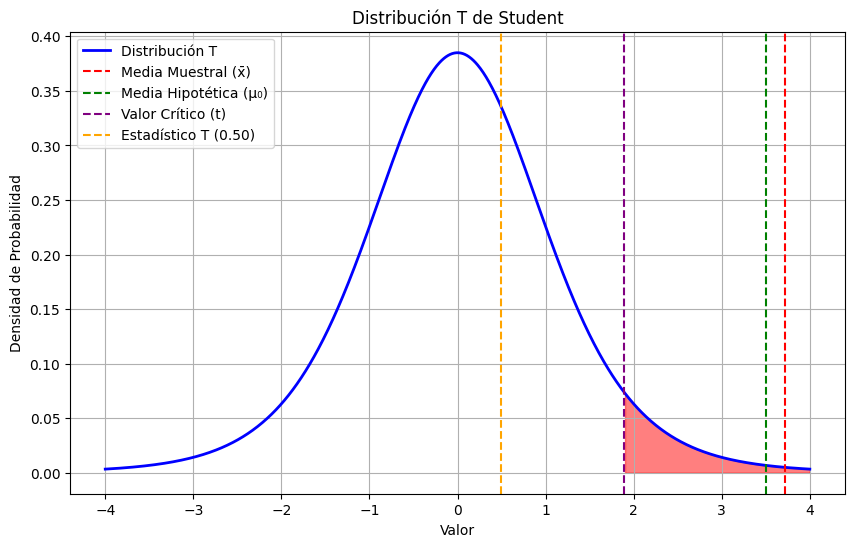

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos
x = 3.72  # media muestral
mu= 3.50   # media 
s = 1.25      # desviacion estandar
n = 8         # tamaño de la muestra
alpha = 0.05  # nivel de significancia

# Calcular  T
T = (x - mu) / (s / np.sqrt(n))

# Grados de libertad
df = n - 1

# Calcular valor critico
t_critico = stats.t.ppf(1 - alpha, df)

# Imprimir resultados
print(f'Media Hipotetica   {mu:.2f}')
print(f'Media muestral x: {x:.2f}')
print(f'Valor T: {T:.2f}')
print(f'Valor critico t: {t_critico:.3f}')

# Decision
if T > t_critico:
    print("Se rechaza la hipotesis nula H0.")
else:
    print("No se rechaza la hipotesis nula H0.")

#Graficar la distribución T
x_vals = np.linspace(-4, 4, 1000)
t_distribution = stats.t.pdf(x_vals, df)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, t_distribution, lw=2, label='Distribución T', color='blue')
plt.axvline(x=x, color='red', linestyle='--', label='Media Muestral (x̄)')
plt.axvline(x=mu, color='green', linestyle='--', label='Media Hipotética (μ₀)')
plt.axvline(x=t_critico, color='purple', linestyle='--', label='Valor Crítico (t)')
plt.axvline(x=T, color='orange', linestyle='--', label=f'Estadístico T ({T:.2f})')
plt.title('Distribución T de Student')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.fill_between(x_vals, t_distribution, where=(x_vals >= t_critico), color='red', alpha=0.5, label='Región de Rechazo')
plt.show()

<div id=ex_6></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_5)   [[Siguiente]](#ex_7) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 6</span>. 


**23. Considera la prueba de hipótesis siguiente:**

H 
0
​ : μ≤12
H 
a
​
 :μ>12



En una muestra de 25, la media muestral fue x = 14\) y la desviación estándar muestral fue \(s = 4.32\).

**a.** Calcule el valor del estadístico de prueba.

**b.** Con \(\alpha = 0.05\), ¿cuál es su conclusión?




Media muestral: 14
Desviacion estandar muestral (s): 4.32
Valor de t : 2.3148148148148144
Valor critico de t: 1.7108820799094275
P-valor: 0.014746797615611484
Rechazar la hipotesis nula (H0):


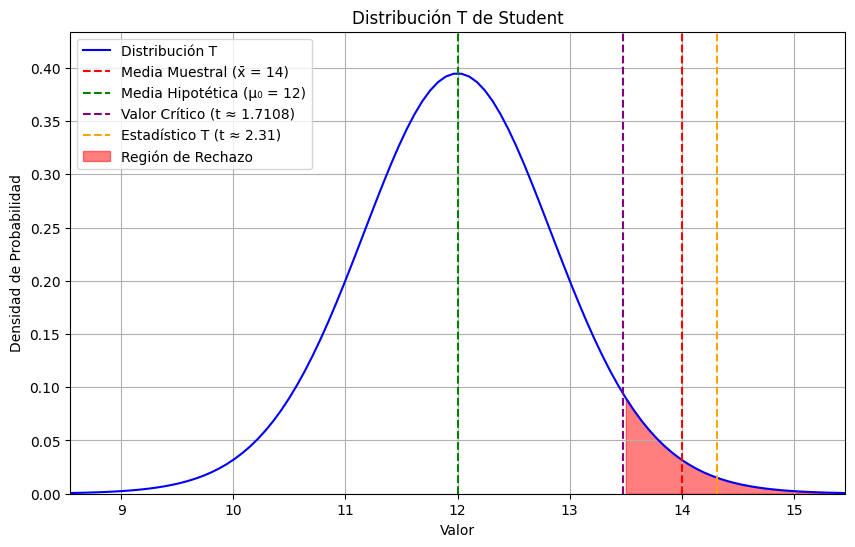

Estadístico T: 2.31


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos
x_bar = 14  # media muestral
mu_0 = 12   # media hipotetica
s = 4.32    # desviacion estandar
n = 25      # tamaño de la muestra
alpha = 0.05 # nivel de significancia

# Calcular prueba T
T = (x_bar - mu_0) / (s / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor critico de t 
t_critical = stats.t.ppf(1 - alpha, df)

# Calcular el p-valor 
p_value = 1 - stats.t.cdf(T, df)

# Valores para la grafica
x = np.linspace(mu_0 - 4*s/n**0.5, mu_0 + 4*s/n**0.5, 100)
y = stats.t.pdf((x - mu_0) / (s / np.sqrt(n)), df)

# Mostrar resultados
print(f"Media muestral: {x_bar}")
print(f"Desviacion estandar muestral (s): {s}")
print(f"Valor de t : {T}")
print(f"Valor critico de t: {t_critical}")
print(f"P-valor: {p_value}")

# Decision
if T > t_critical or p_value < alpha:
    print("Rechazar la hipotesis nula (H0):")
else:
    print("No rechazar la hipotesis nula (H0):")

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución T', color='blue')
plt.axvline(x=x_bar, color='red', linestyle='--', label='Media Muestral (x̄ = 14)')
plt.axvline(x=mu_0, color='green', linestyle='--', label='Media Hipotética (μ₀ = 12)')
plt.axvline(x=t_critical * (s / np.sqrt(n)) + mu_0, color='purple', linestyle='--', label='Valor Crítico (t ≈ 1.7108)')
plt.axvline(x=T + mu_0, color='orange', linestyle='--', label=f'Estadístico T (t ≈ {T:.2f})')

# Rellenar la región de rechazo
plt.fill_between(x, y, where=(x >= t_critical * (s / np.sqrt(n)) + mu_0), color='red', alpha=0.5, label='Región de Rechazo')

plt.title('Distribución T de Student')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.xlim(mu_0 - 4*s/n**0.5, mu_0 + 4*s/n**0.5)  # Ajustar límites de los ejes
plt.ylim(0, max(y) * 1.1)  # Ajustar límite del eje y
plt.show()

# Imprimir el estadístico T
print(f'Estadístico T: {T:.2f}')

<div id=ex_7></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_6)   [[Siguiente]](#ex_8) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 7</span>. 

<p>
    El valor t con n = 14 grados de libertad que deja una área de 0.025 a la izquierda y, por lo tanto, una área de 0.975 a la derecha, es:
</p>

El valor t con 14 grados de libertad que deja un área de 0.025 a la izquierda es: 2.1448


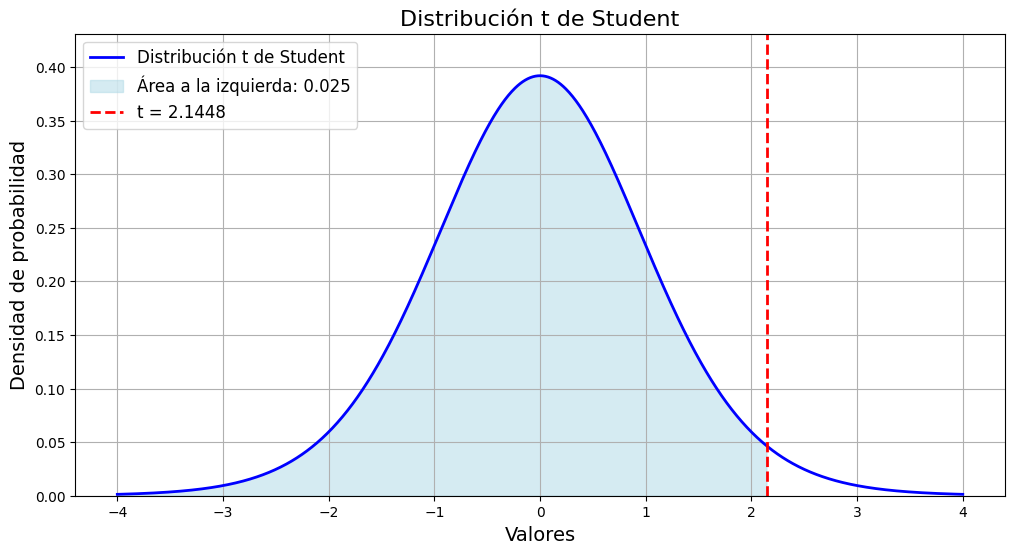

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grados de libertad
df = 14

# Cálculo del valor t para un área de 0.025 a la izquierda
t_valor = stats.t.ppf(0.975, df)
print(f"El valor t con {df} grados de libertad que deja un área de 0.025 a la izquierda es: {t_valor:.4f}")

# Gráfica de la distribución t
x_values = np.linspace(-4, 4, 1000)
y_values = stats.t.pdf(x_values, df)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Distribución t de Student', color='blue', linewidth=2)

# Área a la izquierda de t_valor
plt.fill_between(x_values, y_values, where=(x_values <= t_valor), color='lightblue', alpha=0.5, 
                 label=f'Área a la izquierda: {0.025:.3f}')

# Línea vertical en el valor t
plt.axvline(t_valor, color='red', linestyle='--', label=f't = {t_valor:.4f}', linewidth=2)

plt.title('Distribución t de Student', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Densidad de probabilidad', fontsize=14)
plt.ylim(0, max(y_values) * 1.1)  # Ajustar límite superior del eje y
plt.legend(fontsize=12)
plt.grid()
plt.show()

<div id=ex_8></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_7)   [[Siguiente]](#ex_9) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 8</span>. 

<p>
    Calcule P(-t<sub>0.025</sub> < T < t<sub>0.05</sub>).
</p>

La probabilidad P(-t_0.025 < T < t_0.05) es: 0.9250


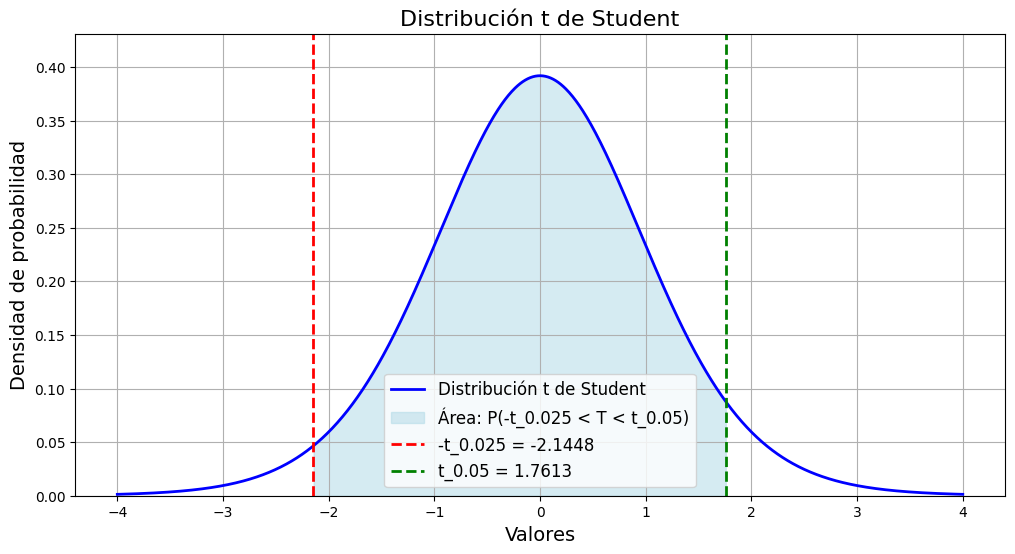

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grados de libertad
df = 14

# Cálculo de los valores t para las áreas especificadas
t_0_025 = stats.t.ppf(0.975, df)  # t para 0.025
t_0_05 = stats.t.ppf(0.95, df)    # t para 0.05

# Cálculo de la probabilidad P(-t_0.025 < T < t_0.05)
probabilidad = stats.t.cdf(t_0_05, df) - stats.t.cdf(-t_0_025, df)

print(f"La probabilidad P(-t_0.025 < T < t_0.05) es: {probabilidad:.4f}")

# Gráfica de la distribución t
x_values = np.linspace(-4, 4, 1000)
y_values = stats.t.pdf(x_values, df)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Distribución t de Student', color='blue', linewidth=2)

# Área entre -t_0.025 y t_0.05
plt.fill_between(x_values, y_values, where=((x_values >= -t_0_025) & (x_values <= t_0_05)), 
                 color='lightblue', alpha=0.5, label=f'Área: P(-t_0.025 < T < t_0.05)')

# Líneas verticales en los valores t
plt.axvline(-t_0_025, color='red', linestyle='--', label=f'-t_0.025 = {-t_0_025:.4f}', linewidth=2)
plt.axvline(t_0_05, color='green', linestyle='--', label=f't_0.05 = {t_0_05:.4f}', linewidth=2)

plt.title('Distribución t de Student', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Densidad de probabilidad', fontsize=14)
plt.ylim(0, max(y_values) * 1.1)  # Ajustar límite superior del eje y
plt.legend(fontsize=12)
plt.grid()
plt.show()

<div id=ex_9></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_8)  
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 9</span>.

<p>
    Calcule \( k \) tal que \( P(k < T < -1.761) = 0.045 \) para una muestra aleatoria de tamaño 15 que se seleccionó de una distribución normal.
</p>

El valor de k tal que P(k < T < -1.761) = 0.045 es: -1.8213


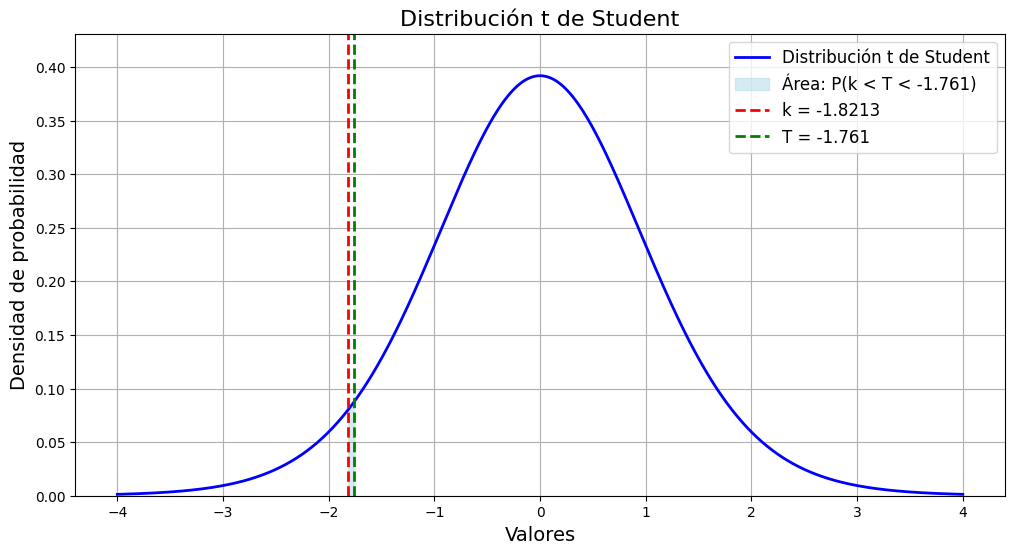

In [8]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grados de libertad
n = 15
df = n - 1

# Valor t dado
t_dado = -1.761

# Probabilidad acumulada
probabilidad_acumulada = 0.045

# Cálculo de k
k = stats.t.ppf(probabilidad_acumulada, df)

print(f"El valor de k tal que P(k < T < -1.761) = 0.045 es: {k:.4f}")

# Gráfica de la distribución t
x_values = np.linspace(-4, 4, 1000)
y_values = stats.t.pdf(x_values, df)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Distribución t de Student', color='blue', linewidth=2)

# Área entre k y -1.761
plt.fill_between(x_values, y_values, where=((x_values >= k) & (x_values <= t_dado)), 
                 color='lightblue', alpha=0.5, label=f'Área: P(k < T < -1.761)')

# Líneas verticales en los valores k y -1.761
plt.axvline(k, color='red', linestyle='--', label=f'k = {k:.4f}', linewidth=2)
plt.axvline(t_dado, color='green', linestyle='--', label=f'T = {t_dado}', linewidth=2)

plt.title('Distribución t de Student', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Densidad de probabilidad', fontsize=14)
plt.ylim(0, max(y_values) * 1.1)  # Ajustar límite superior del eje y
plt.legend(fontsize=12)
plt.grid()
plt.show()